In [1]:
"""
*****************************************************************************
*
* file_name:      Employ_Retaintation_Model_Selaction_Building.py
* version:        1.0
* author:         AJIT KUMAR PATEL
* creation date:  21-OCT-2022
*
* change history:

* description:    Machine learning model implementation & best model selaction.
*
****************************************************************************
"""
#Importing Librabary for python data manipulation
#-------------------------------------------------
import numpy as np 
import pandas as pd 
#Import librabary for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Importing Librabary for machinelearing Regression Implementain
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostClassifier
!pip install xgboost
from xgboost import XGBClassifier

#Importing Librabry for Make Ml model simple and acurate
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
# from vecstack import stacking

#Importing Librabary for evaluation of model
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_auc_score

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# 'Statsmodels' is used to explore data, estimate statistical models, and perform statistical tests
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

#Avoding the worning
import warnings
warnings.filterwarnings('ignore')

In [2]:
#create dataframe to read dataset
df1=pd.read_csv('hr_employee_churn_data.csv')

In [3]:
#check the dataframe and its data
df1.head()

,empid,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,1,0.38,0.53,2,157,3,0,0,low,1
1,2,0.80,0.86,5,262,6,0,0,medium,1
2,3,0.11,0.88,7,272,4,0,0,medium,1
3,4,0.72,0.87,5,223,5,0,0,low,1
4,5,0.37,0.52,2,159,3,0,0,low,1


In [4]:
# check the num of rows and columns in dataframe
df1.shape

(14999, 10)

In [5]:
# check the information of dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   empid                  14999 non-null  int64  
 1   satisfaction_level     14997 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   salary                 14999 non-null  object 
 9   left                   14999 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 1.1+ MB


# Feature Engineering

In [6]:
df2=df1.copy()

In [7]:
# drop empid columns from dataset
df2.drop(['empid'],axis=1,inplace=True)

In [8]:
df2.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left
0,0.38,0.53,2,157,3,0,0,low,1
1,0.80,0.86,5,262,6,0,0,medium,1
2,0.11,0.88,7,272,4,0,0,medium,1
3,0.72,0.87,5,223,5,0,0,low,1
4,0.37,0.52,2,159,3,0,0,low,1


In [9]:
#handle missing values
df2.isnull().sum()

satisfaction_level       2
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
salary                   0
left                     0
dtype: int64

In [10]:
df2['satisfaction_level'].describe()

count    14997.000000
mean         0.612863
std          0.248634
min          0.090000
25%          0.440000
50%          0.640000
75%          0.820000
max          1.000000
Name: satisfaction_level, dtype: float64

In [11]:
# filling null value withe their respective mean 
df2['satisfaction_level'].fillna(df2['satisfaction_level'].mean(), inplace=True)

In [12]:
df2.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
salary                   0
left                     0
dtype: int64

In [13]:
#handle categorical features..salary using get dummies
df2['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [14]:
salary_dummies = pd.get_dummies(df2['salary'],drop_first=True)

In [15]:
# salary_dummies

df2=pd.concat([df2,salary_dummies],axis=1)

In [16]:
df2.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,left,low,medium
0,0.38,0.53,2,157,3,0,0,low,1,1,0
1,0.80,0.86,5,262,6,0,0,medium,1,0,1
2,0.11,0.88,7,272,4,0,0,medium,1,0,1
3,0.72,0.87,5,223,5,0,0,low,1,1,0
4,0.37,0.52,2,159,3,0,0,low,1,1,0


In [17]:
#drop salary feature as we already applied lable endcoding tech
df2.drop(['salary'],axis=1,inplace=True)

In [18]:
df2.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left,low,medium
0,0.38,0.53,2,157,3,0,0,1,1,0
1,0.80,0.86,5,262,6,0,0,1,0,1
2,0.11,0.88,7,272,4,0,0,1,0,1
3,0.72,0.87,5,223,5,0,0,1,1,0
4,0.37,0.52,2,159,3,0,0,1,1,0


# Split Dataset into Training set and Test set

In [19]:
#split dataset into features and label
X= df2.drop(labels='left',axis=1)
y= df2['left']

In [20]:
#split dataset into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [21]:
print(f'the shape of X : {X.shape}')
print(f'the shape of y :{y.shape}') 
print(f'the shape of X_train : {X_train.shape}')
print(f'the shape of y_train : {X_test.shape}')

the shape of X : (14999, 9)
the shape of y :(14999,)
the shape of X_train : (11999, 9)
the shape of y_train : (3000, 9)


# Implementation of Machine Learning Alogorithms:
# Model selaction: 

In [22]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

<AxesSubplot:>

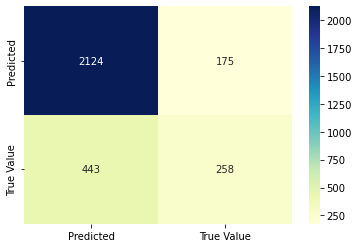

In [23]:
# compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# label the confusion matrix  
conf_matrix=pd.DataFrame(cm,columns=['Predicted','True Value'],index=['Predicted','True Value'])
plt.xlabel('Predicted')
plt.ylabel('True Value')
# plot a heatmap
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
# plt.show()

In [24]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)

In [25]:
multiclass_roc_auc_score(y_test, y_pred)

0.645962798438073

In [26]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# create a list of column names
cols = ['Model', 'AUC Score', 'Precision Score', 'Recall Score','f1-score','Accuracy Score','Train Accuracy']

# creating an empty dataframe of the colums
result_tabulation = pd.DataFrame(columns = cols)

# compiling the required information
Logistic_regression_metrics = pd.Series({'Model': "Logistic regression ",
                     'AUC Score' : multiclass_roc_auc_score(y_test, y_pred),
                 'Precision Score': metrics.precision_score(y_test, y_pred,average='weighted'),
                 'Recall Score': metrics.recall_score(y_test, y_pred,average='weighted'),
                 'f1-score':metrics.f1_score(y_test, y_pred,average='weighted'),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                 'Train Accuracy': logreg.score(X_train,y_train)})



# appending our result table
result_tabulation = result_tabulation.append(Logistic_regression_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,f1-score,Accuracy Score,Train Accuracy
0,Logistic regression,0.645963,0.773312,0.794,0.775331,0.794,0.792399


# Logistic Regression with SGD:

In [27]:
# instantiate the 'SGDClassifier' to bild model using SGD
logreg_with_SGD = SGDClassifier()

# fit the model on training data
logreg_with_SGD.fit(X_train, y_train)

# use predict() to predict the values
logreg_with_SGD_pred = logreg_with_SGD.predict(X_test)

<AxesSubplot:>

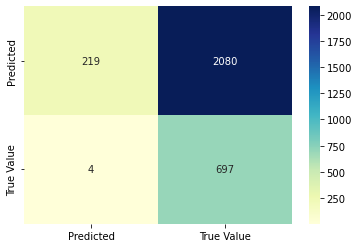

In [28]:
# compute the confusion matrix
cm = confusion_matrix(y_test, logreg_with_SGD_pred)
# label the confusion matrix  
conf_matrix=pd.DataFrame(cm,columns=['Predicted','True Value'],index=['Predicted','True Value'])
plt.xlabel('Predicted')
plt.ylabel('True Value')
# plot a heatmap
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
# plt.show()

In [29]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# compiling the required information
Logistic_regression_SGD_metrics = pd.Series({'Model': "Logistic regression with SGD",
                     'AUC Score' : multiclass_roc_auc_score(y_test, logreg_with_SGD_pred),
                 'Precision Score': metrics.precision_score(y_test, logreg_with_SGD_pred,average='weighted'),
                 'Recall Score': metrics.recall_score(y_test, logreg_with_SGD_pred,average='weighted'),
                 'f1-score':metrics.f1_score(y_test, logreg_with_SGD_pred,average='weighted'),
                 'Accuracy Score': metrics.accuracy_score(y_test, logreg_with_SGD_pred),
                 'Train Accuracy': logreg_with_SGD.score(X_train,y_train)})



# appending our result table
result_tabulation = result_tabulation.append(Logistic_regression_SGD_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,f1-score,Accuracy Score,Train Accuracy
0,Logistic regression,0.645963,0.773312,0.794000,0.775331,0.794000,0.792399
1,Logistic regression with SGD,0.544776,0.811236,0.305333,0.226745,0.305333,0.309026


# Decision Tree:

In [30]:
# instantiate the 'DecisionTreeClassifier' object using 'entropy' criterion
decision_tree_classification = DecisionTreeClassifier(criterion='entropy')
# train model
decision_tree = decision_tree_classification.fit(X_train, y_train)
# predict the model using 'X_test'
decision_tree_pred = decision_tree.predict(X_test)

<AxesSubplot:>

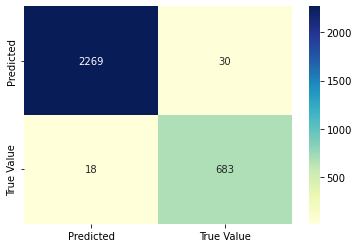

In [31]:
# compute the confusion matrix
cm = confusion_matrix(y_test, decision_tree_pred)
# label the confusion matrix  
conf_matrix=pd.DataFrame(cm,columns=['Predicted','True Value'],index=['Predicted','True Value'])
plt.xlabel('Predicted')
plt.ylabel('True Value')
# plot a heatmap
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
# plt.show()

In [32]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# compiling the required information
Decision_Tree_metrics = pd.Series({'Model': "Decision Tree",
                     'AUC Score' : multiclass_roc_auc_score(y_test, decision_tree_pred),
                 'Precision Score': metrics.precision_score(y_test, decision_tree_pred,average='weighted'),
                 'Recall Score': metrics.recall_score(y_test, decision_tree_pred,average='weighted'),
                 'f1-score':metrics.f1_score(y_test, decision_tree_pred,average='weighted'),
                 'Accuracy Score': metrics.accuracy_score(y_test, decision_tree_pred),
                 'Train Accuracy': decision_tree.score(X_train,y_train)})
# appending our result table
result_tabulation = result_tabulation.append(Decision_Tree_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,f1-score,Accuracy Score,Train Accuracy
0,Logistic regression,0.645963,0.773312,0.794000,0.775331,0.794000,0.792399
1,Logistic regression with SGD,0.544776,0.811236,0.305333,0.226745,0.305333,0.309026
2,Decision Tree,0.980637,0.984137,0.984000,0.984047,0.984000,1.000000


# GRID SEARCH CV:

In [33]:
#create param
model_param = {
    'DecisionTree':{
        'model':DecisionTreeClassifier(),
        'param':{
            "criterion": ["gini", "entropy"],
            "max_depth": range(1,5,1),
            "min_samples_leaf":range(0,50,10),
            "max_leaf_nodes": range(1,5,1)
        }
    },
    'RandomForestClassifier':{
        'model':RandomForestClassifier(),
        'param':{
            'n_estimators': [10, 50, 100, 130], 
            'criterion': ['gini', 'entropy'],
            'max_depth': range(2, 4, 1), 
            'max_features': ['auto', 'log2']
        }
    },
    'XGBClassifier':{
        'model':XGBClassifier(objective='binary:logistic'),
        'param':{
           'learning_rate': [0.5, 0.1, 0.01, 0.001],
            'max_depth': [3, 5, 10, 20],
            'n_estimators': [10, 50, 100, 200]
        }
    }
}

In [34]:
scores =[]
for model_name, mp in model_param.items():
    model_selection = GridSearchCV(estimator=mp['model'],param_grid=mp['param'],cv=5,return_train_score=False)
    model_selection.fit(X,y)
    scores.append({
        'model': model_name,
        'best_score': model_selection.best_score_,
        'best_params': model_selection.best_params_
    })

In [35]:
scores

[{'model': 'DecisionTree',
  'best_score': 0.8235145937534736,
  'best_params': {'criterion': 'gini',
   'max_depth': 3,
   'max_leaf_nodes': 4,
   'min_samples_leaf': 10}},
 {'model': 'RandomForestClassifier',
  'best_score': 0.9170612426364343,
  'best_params': {'criterion': 'entropy',
   'max_depth': 3,
   'max_features': 'auto',
   'n_estimators': 50}},
 {'model': 'XGBClassifier',
  'best_score': 0.9902661776147605,
  'best_params': {'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 200}}]

### The XGBClassifier with best_score': 0.9902661776147605,'best_params': {'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 200 gives the best results

# Model Building

In [36]:
#as per above results, xgboost gives best result and hence selecting same to model building...
model_xgb = XGBClassifier(objective='binary:logistic',learning_rate=0.1,max_depth=20,n_estimators=200)
xgb_model_fit = model_xgb.fit(X_train,y_train)
xgb_model_pred = decision_tree.predict(X_test)

In [37]:
model_xgb.score(X_test,y_test)

0.9923333333333333

<AxesSubplot:>

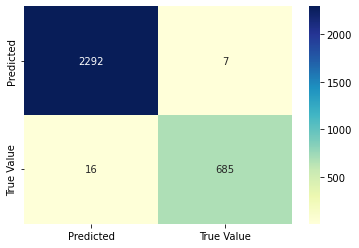

In [38]:
# compute the confusion matrix
cm = confusion_matrix(y_test,model_xgb.predict(X_test))
# label the confusion matrix  
conf_matrix=pd.DataFrame(cm,columns=['Predicted','True Value'],index=['Predicted','True Value'])
plt.xlabel('Predicted')
plt.ylabel('True Value')
# plot a heatmap
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")
# plt.show()

In [39]:
# create the result table for all accuracy scores
# Accuracy measures considered for model comparision are 'Model', 'AUC Score', 'Precision Score', 'Recall Score','Accuracy Score','Kappa Score', 'f1 - score'

# compiling the required information
xgb_classifier_grid_metrics = pd.Series({'Model': "model_xgb",
                     'AUC Score' : multiclass_roc_auc_score(y_test, xgb_model_pred),
                 'Precision Score': metrics.precision_score(y_test, xgb_model_pred,average='weighted'),
                 'Recall Score': metrics.recall_score(y_test, xgb_model_pred,average='weighted'),
                 'f1-score':metrics.f1_score(y_test, xgb_model_pred,average='weighted'),
                 'Accuracy Score': metrics.accuracy_score(y_test, xgb_model_pred),
                 'Train Accuracy': xgb_model_fit.score(X_train,y_train)})

# appending our result table
result_tabulation = result_tabulation.append(xgb_classifier_grid_metrics , ignore_index = True)

# view the result table
result_tabulation

,Model,AUC Score,Precision Score,Recall Score,f1-score,Accuracy Score,Train Accuracy
0,Logistic regression,0.645963,0.773312,0.794000,0.775331,0.794000,0.792399
1,Logistic regression with SGD,0.544776,0.811236,0.305333,0.226745,0.305333,0.309026
2,Decision Tree,0.980637,0.984137,0.984000,0.984047,0.984000,1.000000
3,model_xgb,0.980637,0.984137,0.984000,0.984047,0.984000,0.999833


### over all the "XGB Classifer" model performing well in this data set and give a good score of 0.99233 